## 데이터 Augmentation
- 데이터가 적은 이미지에서 최대한 많은 정보를 뽑아내서 학습하는 기법
- 이미지를 사용할 때마다 임의로 변형을 가하여 더 많은 이미지를 학습하는 것과 같은 효과를 냄
- **과적합(overfitting) 방지**
- ImageDataGenerator 클래스
    - 학습 도중에 이미지에 임의 변형 및 정규화 적용
    - generator 생성
        - 변형된 이미지를 배치 단위로 불러옴
        - flow(data, labels)
        - flow_from_directory(directory) 두 가지 함수를 사용
    - fir_generator, evaluate_generator 함수를 이용하여 generator로 이미지를 불러와서 모델을 학습

## 단순 이미지 파일 증식
- image file Augmentation

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

datagen = ImageDataGenerator(rotation_range=40, #이미지 회전 범위 (degrees)
                            width_shift_range=0.2, # 수평, 수직 랜덤 평행이동
                            height_shift_range=0.2,
                            rescale=1./255, # 입력값을 모델을 효과적으로 학습시키기에 너무 높은 값 255로 나눔
                            shear_range = 0.2, #임의 전단 변환 (shearing transformation) 범위
                            zoom_range = 0.2, #임의 확대/축소 범위
                            horizontal_flip=True, # True로 설정할 경우, 50% 확률로 이미지를 수평으로 뒤집음. 
                             fill_mode='nearest' #이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식
                            )

# image 읽어오기
pil_img = Image.open('data/cat/cat1.jpg')
np_img = np.array(pil_img.convert('RGB'))
np_img = np_img[np.newaxis, :]
print(np_img.shape)

# case 1 - datagen.flow() 함수
i=0;
for batch in datagen.flow(np_img, batch_size=1,
                          save_to_dir='data', save_prefix='aug_cat', save_format='jpg'):
    i+=1
    if i>20:
        print('20장 생성완료')
        break

(1, 112, 112, 3)


## 해당 폴더에 있는 이미지들 Augmentation
- folder file aumentation
- flow_from_directory() : 해당 폴더에 있는 이미지갯수와 라벨링 갯수를 알려줌
    - Found 7 images belonging to 4 classes.
- flow_from_directory는 이미지를 불러올 때 폴더명에 맞춰 자동으로 labeling을 해줌
    - cat, cifar, dog 폴더 순이면 => 0, 1 ,2
    - **img, label = iter.next() 를 통해서 일정한 배치만큼 받아옴**
- 자동으로 

- 폴더 형태
    - cat
        - cat1.jpg
    - dog
        - dog1.jpg
    - cifar
    - girin


In [34]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

batch_size = 3
iterations = 5
image_width, image_height, channel = (112,112,3)
path = 'data'

datagen = ImageDataGenerator(rotation_range=40, #이미지 회전 범위 (degrees)
                            width_shift_range=0.2, # 수평, 수직 랜덤 평행이동
                            height_shift_range=0.2,
                            rescale=1./255, # 입력값을 모델을 효과적으로 학습시키기에 너무 높은 값 255로 나눔
                            shear_range = 0.2, #임의 전단 변환 (shearing transformation) 범위
                            zoom_range = 0.2, #임의 확대/축소 범위
                            horizontal_flip=True, # True로 설정할 경우, 50% 확률로 이미지를 수평으로 뒤집음. 
                            fill_mode='nearest' #이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식
                            )

obj = datagen.flow_from_directory(
    path,
    target_size = (image_width, image_height),
    batch_size = batch_size,
    class_mode = 'binary')

all_images = None
print('한번에 뽑는 이미지 갯수(batch_size)', batch_size)

# 어떤 모양으로 뽑히는지 시각화
visualization(obj)



Found 7 images belonging to 4 classes.
한번에 뽑는 이미지 갯수(batch_size) 3


## OPENCV 이용한 Data Generator 이미지 시각화 모듈

In [ ]:
def visualization(obj):
    for i in range(iterations):
        img, label = obj.next() # obj는 설정된 경로에서 batch_size에 맞춰 이미지를 불러옴
        # label - cat : 0 / cifar : 1 / dog : 2

        # 옆으로 붙이기
        w_images=None
        for idx, i_img in enumerate(img):
            i_img = cv2.cvtColor(i_img, cv2.COLOR_RGB2BGR)  # keras는 RGB, openCV는 BGR이라 변경함
            if idx==0:
                w_images = i_img
            else:
                w_images = np.concatenate((w_images, i_img),axis=1)

        # 부족한 갯수만큼 빈공간으로 채워주기
        for i in range(batch_size-len(label)):
            w_images=np.concatenate((w_images, 
                                     np.empty( shape =(image_width,image_height, channel))
                                    ),axis=1)    
        # 아래로 붙이기
        if i==0:
            all_images = w_images
        else:
            all_images = np.concatenate((all_images, w_images),axis=0)
    cv2.imshow('result', all_images)
    cv2.waitKey(0)


## history 시각화 모듈

In [56]:
# history 시각화 모듈
import matplotlib.pyplot as plt

def visualization_training(hist):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
#     print(hist.history['loss'])
#     print(hist.history['accuracy'])
#     print(hist.history['val_loss'])
#     print(hist.history['val_accuracy'])
    plt.show()

## Cifar Example

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_67 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_68 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 64)        0     

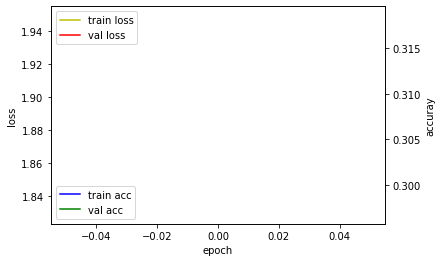

313/313 [==============================] - 22s 70ms/step - loss: 2.7152 - accuracy: 0.1003
[2.715240955352783, 0.10029999911785126]


In [66]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, BatchNormalization, \
    MaxPooling2D, Activation, Dense, Add, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10) # 조기종료 콜백함수
num_classes = 10
epochs = 1
batch_size = 32
dropout_rate = 0.5
image_width, image_height, image_channel = (32,32,3)

# 기본 Cifar Image load
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# one hot encode target values
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


# convert from integers to floats
x_train = x_train.astype('float32')/ 255.0
x_test = x_test.astype('float32')/ 255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# data generator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

# 특성별 정규화에 필요한 수치를 계산합니다
# 샘플 데이터 배열 기반 데이터 의존적인 변형에 관련된 내적 데이터 통계를 계산
# featurewise_center, featurewise_std_normalization, zca_whitening이 참일때만 필요
datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='training')
valid_generator = datagen.flow(x_train, y_train, batch_size=batch_size, subset='validation')

# 모델 생성
# block 1 - CCM
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(image_width, image_height, image_channel), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))  
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))  
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 2 - CM
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))  
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 3 - CM
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))  
model.add(MaxPooling2D(pool_size=(2, 2)))

# block 4 - FF
# classification layer
model.add(Flatten()) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 실시간 데이터 증강을 사용해 배치에 대해서 모델을 학습
hist = model.fit_generator(train_generator,
                           epochs=epochs,
                           steps_per_epoch = len(train_generator), # len(x_train) // batch_size
                           validation_data = valid_generator,
                           callbacks=[early_stopping])

visualization_training(hist)

result = model.evaluate(x_test, y_test)
print(result)

In [65]:
hist.history
result = model.evaluate(x_test, y_test)
print(result)

313/313 [==============================] - 20s 65ms/step - loss: 2.6610 - accuracy: 0.1866
[2.6610171794891357, 0.186599999666214]


## 총요약 !!

#### 1. from tensorflow.keras.preprocessing.image import ImageDataGenerator 라이브러리 참조
#### 2. datagen = ImageDataGenerator 객체 생성 
- 어떠한 형태의 변형 augmentation에 대한 정보 가지고 있음
- rotation_range=40, width_shift_range=0.2 등
    
#### 3. datagen.flow() / datagen.flow_from_directory() 사용
- datagen.flow를 통해 생성된 이미지 배치 단위로 생성 및 저장
- datagen.flow를 통한 학습에 대한 flow 생성 (train, valid 분리 등)
- datagen.flow_from_directory()를 통한 이미지 배치 단위로 로드 
- train_genertor = datagen.flow_from_directory() 폴더에서 읽어와서 생성 가능
- valid_genertor = datagen.flow_from_directory() 폴더에서 읽어와서 생성 가능

#### 4. fit_generator
- model.fit_generator(train_generator, epochs, steps_per_epoch = len(train_generator) or len(x_train) // batch_size
- validation_data = valid_generator, callbacks=[early_stopping])

## 참고문헌
- https://keras.io/ko/preprocessing/image/ // keras 공식 document